## **Our goal is to cluster our customers into buying groups based off of their Annual Income and Spending Scores**

### **Importing the packages**

In [29]:
##Importing the packages
#Data processing packages
import numpy as np 
import pandas as pd 

#Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

### **Importing the data**

In [30]:
#Import Mall Customer data
data = pd.read_csv('../input/Mall_Customers.csv')

**COMMENTS:** The data consists of 1470 rows and 35 columns

# Exploratory Data Analysis (EDA)

In [31]:
#Find the size of the data Rows x Columns
data.shape

(200, 5)

**COMMENTS:** The data consists of 200 rows and 5 columns

In [32]:
#Display first 5 rows of the data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
#Find Basic Statistics like count, mean, standard deviation, min, max etc.
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**COMMENTS:** 
1. Count of 200 for all the fields indicates that there are no missing values in any of the field
3. Minimum(min) and Maximum(max) defines the range of values for that field.
4. Mean(mean) indicates average of all the values in the field.  There is large variation of mean values of the fields so we need to scale the data.
5. 25%, 50%, 75% percentiles indicates the distribution of data

In [34]:
#Find the the information about the fields, field datatypes and Null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**COMMENTS:**  Info fuction is used to list all the field names, their datatypes, count of elements in the field and if the field contacts Null values.

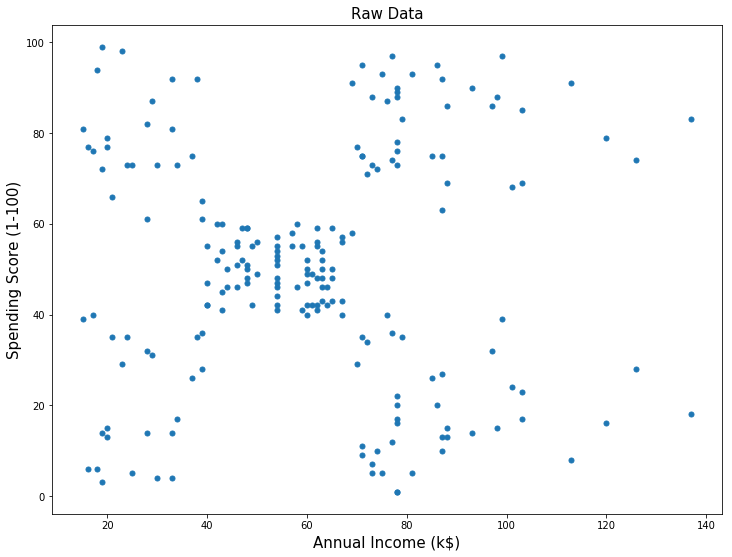

In [37]:
plt.figure(figsize=(12,9))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], s = 25) #Point size is 25
plt.title('Raw Data',fontsize=15)
plt.xlabel('Annual Income (k$)',fontsize=15)
plt.ylabel('Spending Score (1-100)',fontsize=15)
plt.show()

# Data Preprocessing

In [35]:
#Extract Annual Income (k$) and Spending Score (1-100) fields 
target = data.iloc[:,[3,4]]

In [36]:
#Convert to Dataframe to  numpy array
X = np.array(target)

# Classification

* ### **K-Means Algorithm**
https://www.youtube.com/watch?v=_aWzGGNrcic

In [40]:
#Finding kmeans using no. of clusters = 5
kmeans = KMeans(n_clusters = 5, max_iter = 500, n_init = 10, random_state = 0)
kmeans_preds = kmeans.fit_predict(X)

### **Plot the customers with centroids from KMeans Algorithm**
https://www.youtube.com/watch?v=zPJtDohab-g

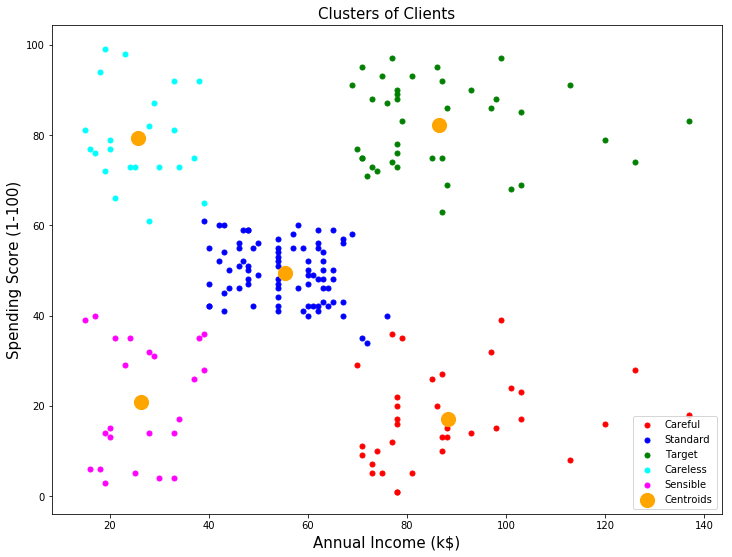

In [43]:
point_size = 25
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
labels = ['Careful', 'Standard', 'Target', 'Careless', 'Sensible']

plt.figure(figsize = (12,9))
for i in range(5):
    plt.scatter(X[kmeans_preds == i,0], X[kmeans_preds == i,1], s = point_size, c = colors[i], label = labels[i])
    
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'orange', label = 'Centroids')
plt.title('Clusters of Clients',fontsize=15)
plt.xlabel('Annual Income (k$)',fontsize=15)
plt.ylabel('Spending Score (1-100)',fontsize=15)
plt.legend(loc = 'best')
plt.show()